Specific Test: Brain data classification

Task: Build a model for classifying the participant data into neural states using PyTorch or Keras.

Dataset Description: The Dataset consists of participant data (rows) of two classes (marked in last column), reflecting different metabolic states. Features (columns) of band power (in theta, delta, alpha, beta, and gamma ranges) have been extracted from a 64-channel EEG recording (you are welcome to use topological information for classification, taking into account that channels are not independent, to improve your results  – channel distribution figure attached).  

Saving EEG data - Sheet1.csv to EEG data - Sheet1.csv
Dataset shape: (40, 322)
Missing values:
0
Class distribution:
target
1    20
0    20
Name: count, dtype: int64
Train shape: (32, 321)
Test shape: (8, 321)


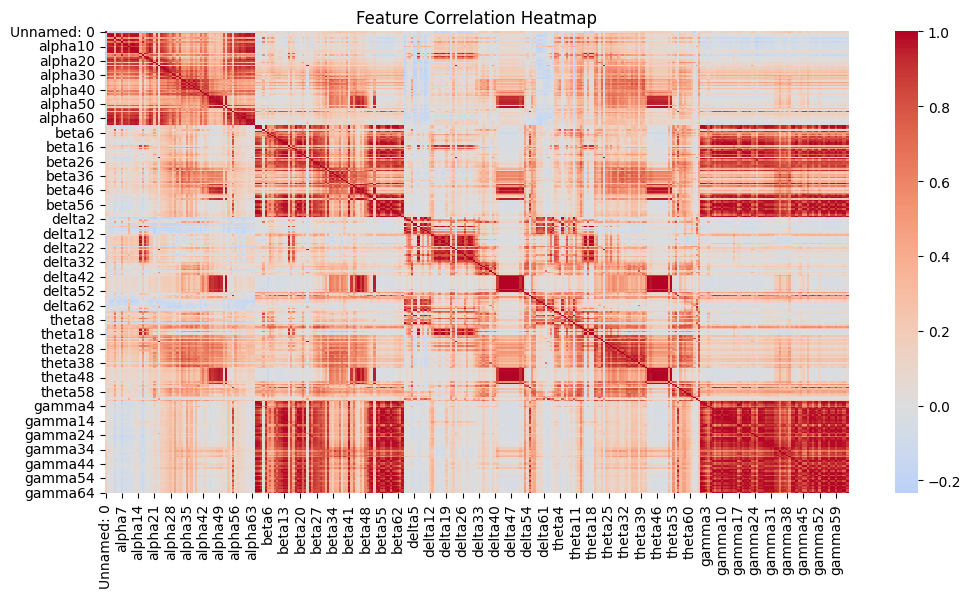

In [2]:
#Task -1:

# In this notebook following tasks are performed:
# 1.Loads your EEG data
# 2.Splits into training/testing sets
# 3.Normalize the input features
# 4.Shows class distribution and feature correlation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Upload and load CSV file in Colab
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('EEG data - Sheet1.csv')  # Make sure name matches the uploaded file
print("Dataset shape:", df.shape)
df.head()


# Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())

# Separate features and target
y = df.iloc[:, -1]  # Last column as target
X = df.iloc[:, :-1] # All other columns as features

# Basic statistics
print("Class distribution:")
print(y.value_counts())

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Optional: visualize correlation
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()